In [1]:
!pip install emoji


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
    --------------------------------------- 10.2/590.6 kB ? eta -:--:--
    --------------------------------------- 10.2/590.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/590.6 kB 262.6 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/590.6 kB 245.8 kB/s eta 0:00:03
   ------ ------------------------------- 102.4/590.6 kB 490.2 kB/s eta 0:00:01
   -------- ----------------------------- 133.1/590.6 kB 522.9 kB/s eta 0:00:01
   -------------- ----------------------- 225.3/590.6 kB 762.6 kB/s eta 0:00:01
   --------------------- ---------------- 327.7/590.6 kB 967.8 kB/s eta 0:00:01
   ------------------------------- -------- 471.0/590.6 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 563.2/590.6 kB 1.3 MB/s eta 0:00

In [3]:
!pip install vaderSentiment
!pip install goolge-api-python-client

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 279.3 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 652.2 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 570.0 kB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement goolge-api-python-client (from versions: none)
ERROR: No matching distribution found for goolge-api-python-client


In [7]:
!pip install google-api-python-client

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.5 MB/s eta 0:00:10
    --------------------------------------- 0.2/13.3 MB 2.1 MB/s eta 0:00:07
    --------------------------------------- 0.3/13.3 MB 2.2 MB/s eta 0:00:06
   - -------------------------------------- 0.5/13.3 MB 2.3 MB/s eta 0:00:06
   - -------------------------------------- 0.5/13.3 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/13.3 MB 2.2 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/13.3 MB 2.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/13.3 MB 2.3 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/13.3 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.2/13.3 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/13.3 MB 2.3 MB/s eta 0:00:06
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
# For Fetching Comments 
from googleapiclient.discovery import build 
# For filtering comments 
import re 
# For filtering comments with just emojis 
import emoji
# Analyze the sentiments of the comment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# For visualization 
import matplotlib.pyplot as plt

In [11]:
# Make sure to put in the API KEY as it won't work otherwise
API_KEY = 'API KEY'# Put in your API Key

youtube = build('youtube', 'v3', developerKey=API_KEY) # initializing Youtube API

# Taking input from the user and slicing for video id
video_id = input('Enter Youtube Video URL: ')[-11:]
print("video id: " + video_id)

# Getting the channelId of the video uploader
video_response = youtube.videos().list(
    part='snippet',
    id=video_id
).execute()

# Splitting the response for channelID
video_snippet = video_response['items'][0]['snippet']
uploader_channel_id = video_snippet['channelId']
print("channel id: " + uploader_channel_id)

Enter Youtube Video URL:  https://www.youtube.com/watch?v=avz06PDqDbM


video id: avz06PDqDbM
channel id: UCF9imwPMSGz4Vq1NiTWCC7g


In [13]:
# Fetch comments
print("Fetching Comments...")
comments = []
nextPageToken = None
while len(comments) < 600:
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        maxResults=100,  # You can fetch up to 100 comments per request
        pageToken=nextPageToken
    )
    response = request.execute()
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        # Check if the comment is not from the video uploader
        if comment['authorChannelId']['value'] != uploader_channel_id:
            comments.append(comment['textDisplay'])
    nextPageToken = response.get('nextPageToken')

    if not nextPageToken:
        break
print(comments)

Fetching Comments...
['O z', 'O', 'I hate grace🗿😬', 'Hate AI, but the rest is okay', 'I tried and tried to watch this. Sorry ABSOLUTE GARBAGE FROM THE STORY TO THE ACTING EVERTHING. longer I watched the worse it got', 'So i recently rewatched all the MI Movies and am going to finally watch Dead Reckoning. Im glad i decided to rewatch all of them and especially Fallout and Rogue Nation because it&#39;s refreshing in my Head now. Cant wait to see this one for The First time! 🤘🤘🤘', 'Plz set me free from this loop 🙏', '<a href="https://www.youtube.com/watch?v=avz06PDqDbM&amp;t=126">2:06</a> That theme song really gets me every single time I listen to it!', 'The introduction of GRACE in the airport as a THIEF was lame. The whole airport scene was lame. Everything about Ilsa (Rebecca Ferguson) rocks! A plot flaw of &quot;Entitey&quot; is that if it is so intelligent and powerful, wouldn&#39;t it know that Grace placed the Key into the pocket of Ilana&#39;s brother?', 'AMp1.Tec1 Highspeed Cab

In [15]:
hyperlink_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

threshold_ratio = 0.65

relevant_comments = []

# Inside your loop that processes comments
for comment_text in comments:

    comment_text = comment_text.lower().strip()

    emojis = emoji.emoji_count(comment_text)

    # Count text characters (excluding spaces)
    text_characters = len(re.sub(r'\s', '', comment_text))

    if (any(char.isalnum() for char in comment_text)) and not hyperlink_pattern.search(comment_text):
        if emojis == 0 or (text_characters / (text_characters + emojis)) > threshold_ratio:
            relevant_comments.append(comment_text)
print(relevant_comments)


['o z', 'o', 'i hate grace🗿😬', 'hate ai, but the rest is okay', 'i tried and tried to watch this. sorry absolute garbage from the story to the acting everthing. longer i watched the worse it got', 'so i recently rewatched all the mi movies and am going to finally watch dead reckoning. im glad i decided to rewatch all of them and especially fallout and rogue nation because it&#39;s refreshing in my head now. cant wait to see this one for the first time! 🤘🤘🤘', 'plz set me free from this loop 🙏', 'the introduction of grace in the airport as a thief was lame. the whole airport scene was lame. everything about ilsa (rebecca ferguson) rocks! a plot flaw of &quot;entitey&quot; is that if it is so intelligent and powerful, wouldn&#39;t it know that grace placed the key into the pocket of ilana&#39;s brother?', 'amp1.tec1 highspeed cable assembler.moto1 best ryder in world1.🎉', 'lets watch this and forget zegler', 'stop killing female characters', 'the last 20 seconds of this trailer is the bes

In [17]:
f = open("ytcomments.txt", 'w', encoding='utf-8')
for idx, comment in enumerate(relevant_comments):
    f.write(str(comment)+"\n")
f.close()
print("Comments stored successfully!")

Comments stored successfully!


In [19]:
def sentiment_scores(comment, polarity):

  # Creating a SentimentIntensityAnalyzer object.
  sentiment_object = SentimentIntensityAnalyzer()

  sentiment_dict = sentiment_object.polarity_scores(comment)
  polarity.append(sentiment_dict['compound'])
  print(sentiment_dict)

  return polarity


polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

f = open("ytcomments.txt", 'r', encoding='`utf-8')
print("Reading Comments...")
comments = f.readlines()
f.close()
print("Analysing Comments...")
for index, items in enumerate(comments):
    polarity = sentiment_scores(items, polarity)


    if polarity[-1] > 0.05:
        positive_comments.append(items)
    elif polarity[-1] < -0.05:
        negative_comments.append(items)
    else:
        neutral_comments.append(items)

print(polarity)


Reading Comments...
Analysing Comments...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.513, 'neu': 0.252, 'pos': 0.235, 'compound': -0.5106}
{'neg': 0.242, 'neu': 0.515, 'pos': 0.242, 'compound': 0.0}
{'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'compound': -0.5385}
{'neg': 0.07, 'neu': 0.884, 'pos': 0.046, 'compound': -0.3802}
{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.5574}
{'neg': 0.135, 'neu': 0.673, 'pos': 0.192, 'compound': 0.5889}
{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.7845}
{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.765}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0

In [21]:
avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity)
if avg_polarity>0.05:
    print("The Video has got a Positive response")
elif avg_polarity<-0.05:
    print("The Video has got a Negative response")
else:
    print("The Video has got a Neutral response")

print("The comment with most positive sentiment:", comments[polarity.index(max(polarity))], "with score", max(polarity), "and length", len(comments[polarity.index(max(polarity))]))
print("The comment with most negative sentiment:", comments[polarity.index(min(polarity))], "with score", min(polarity), "and length", len(comments[polarity.index(min(polarity))]))

Average Polarity: 0.18431566455696202
The Video has got a Positive response
The comment with most positive sentiment: dead reckoning had an even bigger cast, and everyone did a fantastic job. i especially loved hayley atwell; she did a great job in this one. she plays an excellent and charming thief stunning cinematography, unbelievable stunts, gripping suspense-filled storyline and just top notch superb brilliant acting that takes you on a fantastic rollercoaster of emotions.
 with score 0.984 and length 364
The comment with most negative sentiment: the way my mouth dropped 😭😭😭😭😭
 with score -0.9382 and length 31


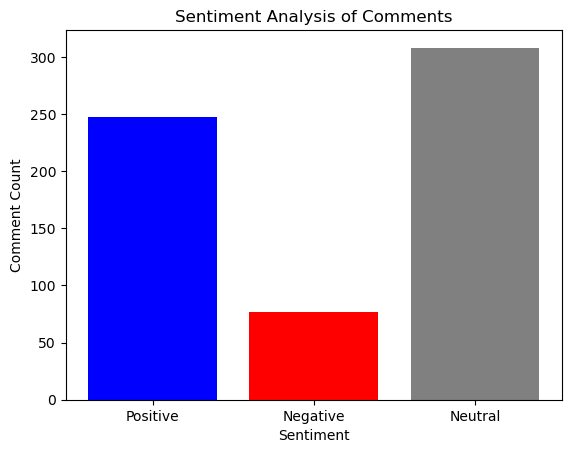

In [23]:
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

# Creating bar chart
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])

# Adding labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')

# Displaying the chart
plt.show()

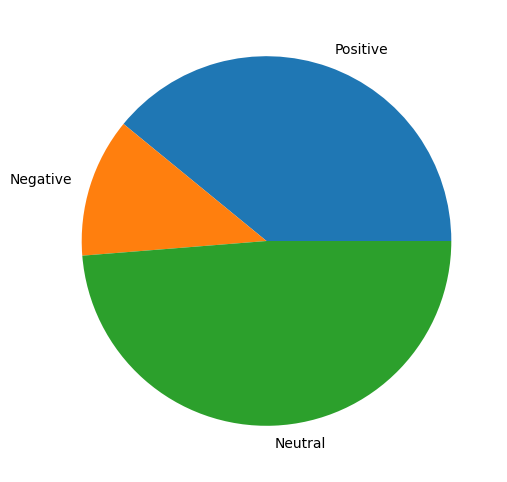

In [25]:
# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(10, 6)) # setting size

# plotting pie chart
plt.pie(comment_counts, labels=labels)

# Displaying Pie Chart
plt.show()


In [27]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


Defaulting to user installation because normal site-packages is not writeable


In [31]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(comment):
    score = analyzer.polarity_scores(comment)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [35]:
import pandas as pd

# Example: if your comments are in a list
comments = ["Nice video!", "I hated it.", "So informative."]
df = pd.DataFrame(comments, columns=['Comment'])
df['Sentiment'] = df['Comment'].apply(analyze_sentiment_vader)

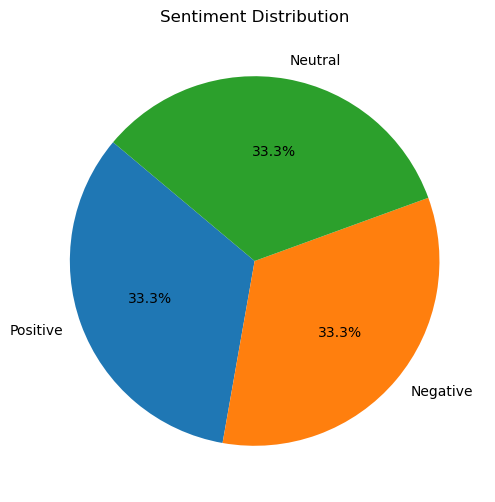

In [37]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 326.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 722.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.2 MB/s eta 0:00:00


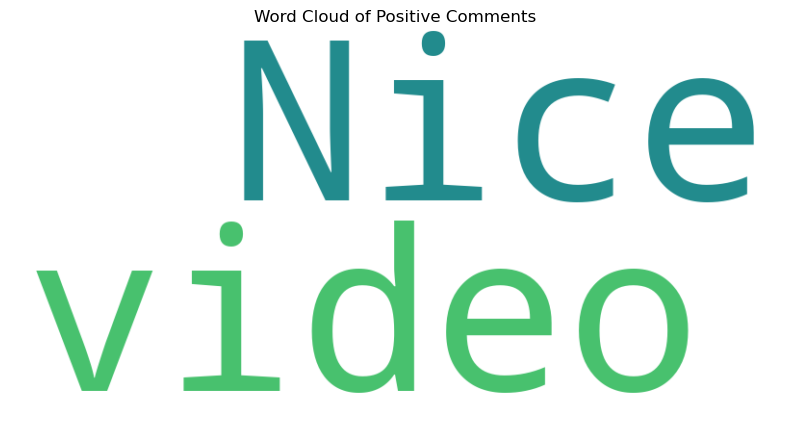

In [39]:
!pip install wordcloud
from wordcloud import WordCloud

text = ' '.join(df[df['Sentiment'] == 'Positive']['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Comments")
plt.show()


In [1]:
# Save this as app.py and run with: streamlit run app.py
import streamlit as st
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    return 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral'

st.title("YouTube Comment Sentiment Analyzer")

uploaded_file = st.file_uploader("Upload CSV of comments", type="csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    df['Sentiment'] = df['Comment'].apply(get_sentiment)
    st.dataframe(df)

    st.bar_chart(df['Sentiment'].value_counts())


2025-07-12 09:57:35.182 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [3]:
import os
os.getcwd()


'C:\\Users\\91990\\YT sentiment'

In [9]:
pip install vaderSentiment


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
code = '''
import streamlit as st
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    return 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral'

st.title("YouTube Comment Sentiment Analyzer")

uploaded_file = st.file_uploader("Upload CSV of comments", type="csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    df['Sentiment'] = df['Comment'].apply(get_sentiment)
    st.dataframe(df)

    st.bar_chart(df['Sentiment'].value_counts())
'''

with open("app.py", "w") as f:
    f.write(code)

print("✅ app.py file created successfully!")


✅ app.py file created successfully!


In [7]:
import os
os.listdir()


['.ipynb_checkpoints',
 'app.py',
 'Untitled.ipynb',
 'YT Sentiment.ipynb',
 'ytcomments.txt']